#HT
#Section 1: z-Test

In [1]:
import numpy as np
import scipy.stats as st

1.1 : Ages of Medical doctors

In [2]:
#h0 -> mean = 46, h1 -> mean > 46
n = 30              #random sample
rsm = 48.6          #random sample mean
m = 46
std = 4.2
alpha = 0.05

In [3]:
z_critical = abs(st.norm.ppf(alpha))
z_critical

1.6448536269514729

In [4]:
z = (rsm - m)/(std/np.sqrt(n))
z

3.3906634512224585

In [5]:
if z < z_critical :
  print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")


Reject null hypothesis


#Section 2: Using P - value
2.1 : Wind Speed

In [6]:
# h0: m = 8, h1: m != 8
n = 32
rsm = 8.2
std = 0.6
m = 8
alpha = 0.05


In [7]:
z = (rsm - m)/(std/np.sqrt(n))
z

1.8856180831641203

In [8]:
p_val = (1 - st.norm.cdf(abs(z))) * 2
p_val

0.0593464387919207

In [9]:
if (p_val > alpha):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


#Section 3: t-Test
3.1 : Hospital Infections

In [10]:
# h0 -> m = 16.3, h1 -> m != 16.3
n = 10
dof = n - 1           #dof: degree of freedom
rsm = 17.7
m = 16.3
std = 1.8
alpha = 0.05

In [11]:
t = (rsm - m)/(std/np.sqrt(n))
t

2.4595492912420704

In [12]:
t_critical = st.t.ppf(alpha/2, dof)
t_critical

-2.262157162740992

In [13]:
if(abs(t) > abs(t_critical)):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


#Section 4: t-Test using P-value
4.1 : Jogger’s Oxygen Uptake

In [14]:
# h0 -> m = 36.7, h1 -> m > 36.7
n = 15
dof = n - 1
rsm = 40.6
m = 36.7
std = 6
alpha = 0.05

In [15]:
t = (rsm - m)/(std / np.sqrt(n))
t

2.51743917503482

In [16]:
p_val = (1 - st.t.cdf(abs(t), dof))
p_val

0.012311189053656801

In [17]:
if(p_val > alpha):
  print("Null hypothesis cannot be rejected")
else:
  print("Reject null hypothesis")

Reject null hypothesis


#Robert Swain's Trial

In [1]:
ep = [0.26, 0.74]

In [3]:
import numpy as np
import numpy.random as npr

In [31]:
npr.binomial(100, 0.26)

26

In [46]:
sim = 100
for i in np.arange(sim):
  black_pop = npr.binomial(100, 0.26, sim)
black_pop

array([18, 22, 18, 34, 35, 31, 30, 30, 26, 26, 25, 26, 26, 30, 33, 28, 31,
       27, 27, 34, 23, 28, 23, 26, 23, 15, 34, 28, 23, 33, 23, 26, 33, 25,
       27, 32, 20, 23, 15, 27, 23, 23, 22, 26, 29, 26, 25, 31, 25, 39, 25,
       24, 31, 32, 28, 26, 23, 21, 26, 28, 23, 22, 32, 27, 28, 29, 33, 27,
       27, 31, 22, 35, 21, 24, 25, 33, 30, 28, 19, 33, 25, 22, 19, 31, 29,
       24, 22, 22, 30, 24, 27, 25, 33, 28, 21, 38, 26, 18, 24, 24])

In [47]:
%matplotlib inline
import pandas as pd
panel = pd.DataFrame(black_pop)
panel.head()

,0
0,18
1,22
2,18
3,34
4,35


In [53]:
panel.min()

0    15
dtype: int64

In [54]:
panel.max()

0    39
dtype: int64

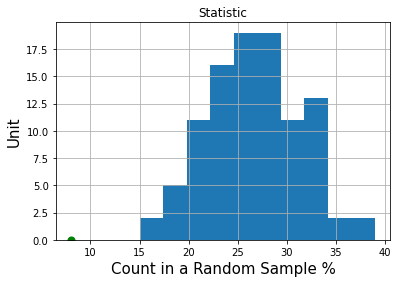

In [50]:
import matplotlib.pyplot as plt
panel.hist()
plt.title('Statistic')
plt.xlabel('Count in a Random Sample %', fontsize = 15)
plt.ylabel('Unit', fontsize = 15)
plt.scatter(8, 0, color='green', s = 50)

Inference: 8 is way too low compared to the simulation of 100 times in which the number of black jurors were randomly selected that ranges from 15 to 39.

Therefore, it is evidence that Swain's jury panel was not sampled randomly from the population of eligible jurors.

#Jury Alameda County

In [2]:
# h0 -> Panels were selected at random from the population of eligible jurors.

# h1 -> Panels were not selected at random

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

jury = {"Ethnicity":["Asian","Black","Latino","White","Other"], "Eligible":[0.15,0.18,0.12,0.54,0.01],"Panels":[0.26,0.08,0.08,0.54,0.04]}
jury

{'Ethnicity': ['Asian', 'Black', 'Latino', 'White', 'Other'],
 'Eligible': [0.15, 0.18, 0.12, 0.54, 0.01],
 'Panels': [0.26, 0.08, 0.08, 0.54, 0.04]}

In [3]:
Alameda = pd.DataFrame(jury)
Alameda

,Ethnicity,Eligible,Panels
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


In [4]:
Alameda1 = Alameda.set_index("Ethnicity")
Alameda1

,Eligible,Panels
Ethnicity,,
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


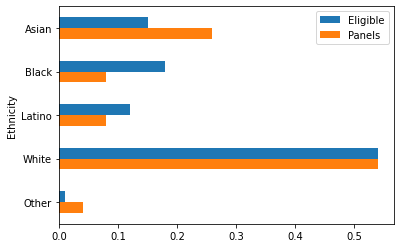

In [5]:
Alameda1.plot.barh()
plt.ylabel("Ethnicity")
plt.gca().invert_yaxis()

In [62]:
Alameda1['Jury Diff'] = Alameda1['Panels']-Alameda1["Eligible"]
Alameda1

,Eligible,Panels,Jury Diff
Ethnicity,,,
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.10
Latino,0.12,0.08,-0.04
White,0.54,0.54,0.00
Other,0.01,0.04,0.03


In [63]:
Alameda1["Abs Diff"] = abs(Alameda1["Jury Diff"])
Alameda1

,Eligible,Panels,Jury Diff,Abs Diff
Ethnicity,,,,
Asian,0.15,0.26,0.11,0.11
Black,0.18,0.08,-0.10,0.10
Latino,0.12,0.08,-0.04,0.04
White,0.54,0.54,0.00,0.00
Other,0.01,0.04,0.03,0.03


In [64]:
test_statistic = Alameda1['Abs Diff'].sum()/2
test_statistic

0.14

#Random Sampling

In [6]:
Panel_size = 1000
import numpy.random as npr
np.random.multinomial(1000,[0.15,0.18,0.12,0.54,0.01])

array([155, 178, 131, 526,  10])

In [7]:
Alameda2 = pd.DataFrame(Alameda1,columns = ['Eligible','Panels'])


In [30]:
Alameda2['Random Sample'] = np.random.multinomial(1000,[0.15,0.18,0.12,0.54,0.01])/1000
Alameda2

,Eligible,Panels,Random Sample
Ethnicity,,,
Asian,0.15,0.26,0.159
Black,0.18,0.08,0.182
Latino,0.12,0.08,0.114
White,0.54,0.54,0.534
Other,0.01,0.04,0.011


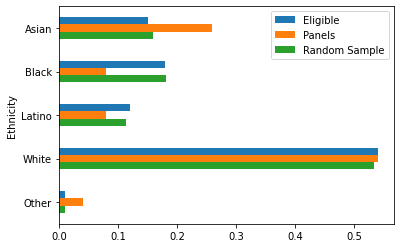

In [31]:
Alameda2.plot.barh()
plt.ylabel('Ethnicity')
plt.gca().invert_yaxis()

Inference: this bar shows that if the samples are selected randomly then it is closer to the eligible population than it is to the actual panels

In [32]:
TVD = (abs(Alameda2['Eligible']-Alameda2['Random Sample'])).sum()/2
TVD

0.012000000000000004

In [37]:
def total_variation_distance(distribution_1, distribution_2):
    return np.abs(distribution_1 - distribution_2).sum()/2

def table_tvd(table, label, other):
    return total_variation_distance(table[label], table[other])

observed_stat =table_tvd(Alameda, 'Eligible', 'Panels')
print(observed_stat)

0.14


In [38]:
sims = 5000
tvdl=[]
for i in np.arange(sims):
    Alameda2["Random Sample"]=(npr.multinomial(1000,[0.15, 0.18, 0.12, 0.54, 0.01]))/Panel_size
    tvdl.append(table_tvd(Alameda2, 'Eligible', 'Random Sample'))
    
tvdl

[0.03400000000000003,
 0.03,
 0.022000000000000013,
 0.028999999999999998,
 0.010000000000000009,
 0.01800000000000001,
 0.027999999999999962,
 0.049000000000000044,
 0.011000000000000008,
 0.025000000000000015,
 0.022,
 0.019999999999999997,
 0.02600000000000001,
 0.019000000000000003,
 0.024,
 0.014000000000000009,
 0.027000000000000003,
 0.04299999999999995,
 0.016000000000000014,
 0.019000000000000003,
 0.03999999999999996,
 0.031000000000000014,
 0.027000000000000003,
 0.007000000000000005,
 0.020000000000000004,
 0.045999999999999944,
 0.014000000000000005,
 0.027000000000000024,
 0.025,
 0.022,
 0.014000000000000012,
 0.020000000000000018,
 0.024999999999999946,
 0.0040000000000000036,
 0.03300000000000001,
 0.02400000000000002,
 0.013000000000000008,
 0.01100000000000001,
 0.02400000000000002,
 0.009000000000000008,
 0.015000000000000006,
 0.01400000000000001,
 0.01500000000000001,
 0.027999999999999997,
 0.020000000000000018,
 0.02000000000000001,
 0.014999999999999998,
 0.021

In [39]:
tvd_final=pd.DataFrame(tvdl)
tvd_final.rename(columns={0:"TVD"},inplace=True) 
tvd_final.head()

,TVD
0,0.034
1,0.030
2,0.022
3,0.029
4,0.010


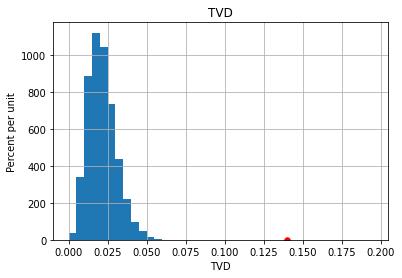

In [40]:
tvd_final.hist(bins=np.arange(0,0.2,0.005))
plt.ylabel('Percent per unit')
plt.xlabel('TVD')
plt.scatter(observed_stat, 0, color='red', s=30)

In [41]:
tvd_final.max()

TVD    0.061
dtype: float64

Inference: this graph therefore shows us that the total variation distance between eligible population and the panels is way too high compared to the simulation of 5000 times with a panel size of 1000 where the total variation distance between eligible population and the random sample is atmost only 0.061,
so we can conclude that the panels were not randomly sampled.

#Hence, the Null hypothesis is rejected